In [1]:
# setup
import numpy as np
import gzip
import numpy as np
import math
import matplotlib.pyplot as plt


In [2]:
def set_binary_labels_by_digit(labels_in, digit):
    d = np.zeros((labels_in.shape[0],1))

    for i in range(labels_in.shape[0]):
        if labels_in[i] == digit:
            d[i] = 1
        else:
            d[i] = -1
    
    return d


In [3]:
def select_random_subset(features, labels, subset_size):
    set_indices = np.arange(labels.shape[0])
    subset_indices = np.random.choice(set_indices,5,replace=False)
    
    subset_features = np.zeros((subset_size, features.shape[1]))
    subset_labels = np.zeros((subset_size, 1))
    
    for i, subset_index in enumerate(subset_indices):
        subset_features[i] = features[subset_index]
        subset_labels[i] = labels[subset_index]
        
    return subset_features, subset_labels

# Data Imports

In [4]:
# specify size of images
image_rows = 28
image_cols = 28

## Training data and labels

In [5]:
# open training set image file
f = gzip.open('train-images-idx3-ubyte.gz','r')

num_train_images = 60000

f.read(16)
buf = f.read(image_rows * image_cols * num_train_images)
train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
train_data = train_data.reshape(num_train_images, image_rows, image_cols,1)

In [6]:
# open training set label file

f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)

buf = f.read(num_train_images)
train_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
train_labels = train_labels.reshape(num_train_images,1)

training data: (60000, 28, 28, 1) 

image index 0:


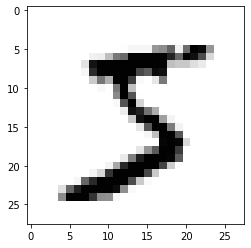

label: [5.]
(28, 28, 1)
(28, 28)


In [7]:
# troubleshoot data import

ind = 0

print('training data:', train_data.shape, '\n')

# print training image
print('image index ' + str(ind) + ':')
image = np.asarray(train_data[ind]).squeeze()
#plt.title(['image index', ind])
plt.imshow(image, cmap='Greys')
plt.show()
# print training label
print('label:', train_labels[ind])

print(train_data[ind].shape)
print(image.shape)

## Test data and labels

In [8]:
# open test set image file
f = gzip.open('t10k-images-idx3-ubyte.gz','r')

num_test_images = 10000

f.read(16)
buf = f.read(image_rows * image_cols * num_test_images)
test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(num_test_images, image_rows, image_cols,1)

In [9]:
# open test set label file

f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(num_test_images)
test_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_labels = test_labels.reshape(num_test_images,1)

test data: (10000, 28, 28, 1)
image index 0:


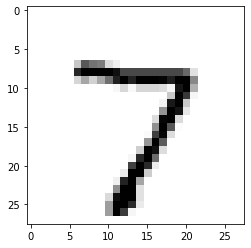

label: [7.]


In [10]:
# troubleshoot test data import

ind = 0

print('test data:', test_data.shape)

# print training image
print('image index ' + str(ind) + ':')
image = np.asarray(test_data[ind]).squeeze()
#plt.title(['image index', ind])
plt.imshow(image, cmap='Greys')
plt.show()
# print training label
print('label:', test_labels[ind])

# Least Sqaures Classification with Ridge Regression

In [11]:
# optimize best regularizer
lamdas = np.logspace(-4,5,num=20)
digits = np.array([0,1,2,3,4,5,6,7,8,9])

print('lamdas:\n', lamdas, '\n')

# normalize array and reshape into flattened image vectors, and shuffle randomly
A_opt = train_data.reshape(num_train_images, image_rows*image_cols)/255
d_opt = train_labels

# randomly shuffle
A_opt = np.hstack((A_opt, d_opt))
np.random.shuffle(A_opt)
d_opt = A_opt[:,-1:]
A_opt = A_opt[:,:-1]

# find best lamda for all binary classifiers
A_train = A_opt[:50000,:]
A_eval = A_opt[50000:,:]
best_lamdas = [0] * len(digits)
error_rates = np.zeros((len(digits),len(lamdas)))

# get error rate for every digit
for digit in digits:
    
    d_train = set_binary_labels_by_digit(d_opt[:50000,:], digit)
    d_eval = set_binary_labels_by_digit(d_opt[50000:,:], digit)

    # for every lamda, get avg error rate over all digits
    for i, lamda in enumerate(lamdas):
        
        # train with first 50K
        w = np.linalg.inv(A_train.T@A_train+lamda*np.identity(A_train.shape[1]))@A_train.T@d_train
        
        # evaluate classifier with last 10K
        d_hat_eval = np.sign(A_eval@w)
        errors = np.count_nonzero(d_eval-d_hat_eval!=0)
        error_rates[digit, i] = (errors/d_hat_eval.shape[0])
    
    # pick lamda with lowest error rate
    best_lamdas[digit] = lamdas[np.argmin(error_rates[digit])]
    print('digit:', digit, '-', error_rates[digit])

print('\nbest lamdas:\n', best_lamdas, '\n')


lamdas:
 [1.00000000e-04 2.97635144e-04 8.85866790e-04 2.63665090e-03
 7.84759970e-03 2.33572147e-02 6.95192796e-02 2.06913808e-01
 6.15848211e-01 1.83298071e+00 5.45559478e+00 1.62377674e+01
 4.83293024e+01 1.43844989e+02 4.28133240e+02 1.27427499e+03
 3.79269019e+03 1.12883789e+04 3.35981829e+04 1.00000000e+05] 

digit: 0 - [0.0179 0.0179 0.0178 0.0177 0.0177 0.0177 0.0177 0.0175 0.0176 0.0177
 0.0176 0.0174 0.0176 0.0173 0.0179 0.0187 0.0198 0.0211 0.0266 0.0416]
digit: 1 - [0.0193 0.0193 0.0193 0.0192 0.0192 0.0192 0.0193 0.0192 0.0192 0.0191
 0.019  0.019  0.0189 0.0191 0.019  0.0189 0.0184 0.0179 0.0215 0.0458]
digit: 2 - [0.0359 0.036  0.036  0.0359 0.0359 0.0359 0.0359 0.0356 0.0356 0.0353
 0.0355 0.0357 0.0352 0.0351 0.0353 0.0361 0.0384 0.0433 0.0614 0.0914]
digit: 3 - [0.0451 0.0451 0.0451 0.0451 0.045  0.045  0.045  0.045  0.045  0.0447
 0.0449 0.0448 0.0446 0.0438 0.044  0.0438 0.0458 0.0511 0.0656 0.0965]
digit: 4 - [0.029  0.029  0.029  0.029  0.029  0.029  0.029  0.0289

In [12]:
# train classifier with optimized regularizer

A_train = train_data.reshape(num_train_images, image_rows*image_cols)/255
A_test = test_data.reshape(num_test_images, image_rows*image_cols)/255

W = np.zeros((A_train.shape[1],len(digits)))
print(W.shape)

# train and test classifier for every digit
train_error_rate_by_digit = [0] * len(digits)
test_error_rate_by_digit = [0] * len(digits)

for digit in digits:

    # train classifier with optimized lamda and training data
    d_train = set_binary_labels_by_digit(train_labels, digit)
    W[:,digit:digit+1] = np.linalg.inv(A_train.T@A_train+best_lamdas[digit]*np.identity(A_train.shape[1]))@A_train.T@d_train
    
    # find training error
    d_hat_train = np.sign(A_train@W[:,digit:digit+1])
    errors = np.count_nonzero(d_train-d_hat_train!=0)
    train_error_rate_by_digit[digit] = (errors/d_hat_train.shape[0])
    
    # test trained classifier with test data
    d_test = set_binary_labels_by_digit(test_labels, digit)
    d_hat_test = np.sign(A_test@W[:,digit:digit+1])
    errors = np.count_nonzero(d_test-d_hat_test!=0)
    test_error_rate_by_digit[digit] = (errors/d_hat_test.shape[0])

print('\ntraining error:\n', np.round(train_error_rate_by_digit,4), '\n average:', np.round(np.average(train_error_rate_by_digit),5))
print('\ntest error:\n', np.round(test_error_rate_by_digit,4), '\n average:', np.round(np.average(test_error_rate_by_digit),5))


(784, 10)

training error:
 [0.0154 0.0176 0.0358 0.0427 0.0284 0.0516 0.0221 0.027  0.0629 0.0578] 
 average: 0.03615

test error:
 [0.0121 0.0161 0.0375 0.0414 0.0299 0.0504 0.0239 0.0283 0.0673 0.0558] 
 average: 0.03627


# LASSO

In [13]:
def ista_solve_hot( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**3
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [14]:
# optimize best regularizer
lamdas = np.logspace(-4,5,num=20)
digits = np.array([0,1,2,3,4,5,6,7,8,9])

print('lamdas:\n', lamdas, '\n')

# normalize array and reshape into flattened image vectors
A_opt = train_data.reshape(num_train_images, image_rows*image_cols)/255
d_opt = train_labels

# randomly shuffle
A_opt = np.hstack((A_opt, d_opt))
np.random.shuffle(A_opt)
d_opt = A_opt[:,-1:]
A_opt = A_opt[:,:-1]

# find best lamda for all binary classifiers
A_train = A_opt[:50000,:]
A_eval = A_opt[50000:,:]
best_lamdas = [0] * len(digits)
   
# get error rate for every digit
error_rates = np.zeros((len(digits),len(lamdas)))
for digit in digits:

    # train with first 50K
    d_train = set_binary_labels_by_digit(d_opt[:50000,:], digit)
    W = ista_solve_hot(A_train,d_train,lamdas)

    # evaluate classifier with last 10K
    d_eval = set_binary_labels_by_digit(d_opt[50000:,:], digit)
    d_hat_eval = np.sign(A_eval@W)
    errors = np.count_nonzero(d_eval-d_hat_eval!=0,axis=0)
    error_rates[digit] = (errors/d_hat_eval.shape[0])
    best_lamdas[digit] = lamdas[np.argmin(error_rates[digit])]
    print('digit:', digit, '-', error_rates[digit])

print('\nbest lamdas:\n', best_lamdas, '\n')


lamdas:
 [1.00000000e-04 2.97635144e-04 8.85866790e-04 2.63665090e-03
 7.84759970e-03 2.33572147e-02 6.95192796e-02 2.06913808e-01
 6.15848211e-01 1.83298071e+00 5.45559478e+00 1.62377674e+01
 4.83293024e+01 1.43844989e+02 4.28133240e+02 1.27427499e+03
 3.79269019e+03 1.12883789e+04 3.35981829e+04 1.00000000e+05] 

digit: 0 - [0.0186 0.0186 0.0186 0.0186 0.0186 0.0186 0.0186 0.0186 0.0187 0.0186
 0.0186 0.0186 0.0185 0.0185 0.02   0.0266 0.0374 0.1022 0.116  1.    ]
digit: 1 - [0.0187 0.0187 0.0187 0.0187 0.0188 0.0187 0.0188 0.0188 0.0187 0.0187
 0.0188 0.0188 0.0188 0.0188 0.0184 0.0202 0.0367 0.1139 0.1189 1.    ]
digit: 2 - [0.0378 0.0378 0.0377 0.0376 0.0376 0.0377 0.0375 0.0375 0.0375 0.0375
 0.0375 0.0375 0.0375 0.0375 0.0403 0.055  0.0976 0.0984 0.0994 1.    ]
digit: 3 - [0.047  0.0469 0.0469 0.0469 0.0469 0.047  0.047  0.0471 0.0471 0.0472
 0.0472 0.0472 0.0472 0.0471 0.0485 0.0633 0.0996 0.1    0.1055 1.    ]
digit: 4 - [0.0351 0.035  0.035  0.035  0.0351 0.0351 0.0351 0.0352

In [26]:
# train classifier with optimized regularizer
A_train = train_data.reshape(num_train_images, image_rows*image_cols)/255
A_test = test_data.reshape(num_test_images, image_rows*image_cols)/255

W = np.zeros((A_train.shape[1],len(digits)))

# train and test classifier for every digit
train_error_rate_by_digit = [0] * len(digits)
test_error_rate_by_digit = [0] * len(digits)

for digit in digits:
    lamda = [0] * 1
    lamda[0] = best_lamdas[digit]
    
    # train classifier with optimized lamda and training data
    d_train = set_binary_labels_by_digit(train_labels, digit)
    W[:,digit:digit+1] = ista_solve_hot(A_train,d_train,lamda)
    
    # find training error
    d_hat_train = np.sign(A_train@W[:,digit:digit+1])
    errors = np.count_nonzero(d_train-d_hat_train!=0)
    train_error_rate_by_digit[digit] = (errors/d_hat_train.shape[0])
    
    # test trained classifier with test data
    d_test = set_binary_labels_by_digit(test_labels, digit)
    d_hat_test = np.sign(A_test@W[:,digit:digit+1])
    errors = np.count_nonzero(d_test-d_hat_test!=0)
    test_error_rate_by_digit[digit] = (errors/d_hat_test.shape[0])

print('\ntraining error:\n', np.round(train_error_rate_by_digit,4), '\n average:', np.round(np.average(train_error_rate_by_digit),5))
print('\ntest error:\n', np.round(test_error_rate_by_digit,4), '\n average:', np.round(np.average(test_error_rate_by_digit),5))



training error:
 [0.019  0.0192 0.0393 0.0466 0.0357 0.0656 0.0235 0.0282 0.071  0.0749] 
 average: 0.0423

test error:
 [0.0157 0.0171 0.0397 0.045  0.0353 0.0632 0.0247 0.028  0.0752 0.071 ] 
 average: 0.04149


# SVM

In [34]:
from sklearn.svm import LinearSVC

A_train = train_data.reshape(num_train_images, image_rows*image_cols)/255
A_test = test_data.reshape(num_test_images, image_rows*image_cols)/255
n_train = np.size(A_train[:,0:1])
n_test = np.size(A_test[:,0:1])

A_train_1 = np.hstack((A_train, np.ones((n_train,1)) ))
A_test_1 = np.hstack((A_test, np.ones((n_test,1)) ))

# train and test classifier for every digit
train_error_rate_by_digit = [0] * len(digits)
test_error_rate_by_digit = [0] * len(digits)
digits = np.array([0,1,2,3,4,5,6,7,8,9])
W = np.zeros((A_train_1.shape[1],len(digits)))
#print(W.shape)

for digit in digits:

   # Train classifier using linear SVM from SK Learn library
    clf = LinearSVC(random_state=0, dual=False)
    d_train = set_binary_labels_by_digit(train_labels, digit)
    clf.fit(A_train_1, np.squeeze(d_train))
    W[:,digit:digit+1] = clf.coef_.transpose()
    #print('done training', digit)
    
    # find training error
    d_hat_train = np.sign(A_train_1@W[:,digit:digit+1])
    errors = np.count_nonzero(d_train-d_hat_train!=0)
    train_error_rate_by_digit[digit] = (errors/d_hat_train.shape[0])
    
    # test trained classifier with test data
    d_test = set_binary_labels_by_digit(test_labels, digit)
    d_hat_test = np.sign(A_test_1@W[:,digit:digit+1])
    errors = np.count_nonzero(d_test-d_hat_test!=0)
    test_error_rate_by_digit[digit] = (errors/d_hat_test.shape[0])



In [35]:
print('\ntraining error:\n', np.round(train_error_rate_by_digit,4), '\n average:', np.round(np.average(train_error_rate_by_digit),5))
print('\ntest error:\n', np.round(test_error_rate_by_digit,4), '\n average:', np.round(np.average(test_error_rate_by_digit),5))



training error:
 [0.0123 0.0066 0.0238 0.049  0.0161 0.024  0.0211 0.0132 0.1994 0.0728] 
 average: 0.04383

test error:
 [0.0143 0.0067 0.0227 0.0482 0.0186 0.0234 0.023  0.0171 0.207  0.0736] 
 average: 0.04546
